# Simple Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#1st step load the dataset
df=pd.read_csv("/kaggle/input/height-weight/height-weight.csv")

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

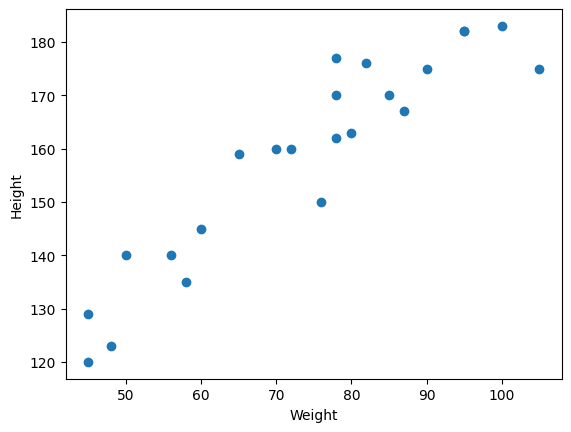

In [7]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [9]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [10]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [12]:
#divide the dataset,its dependent features, independent features
x=df[['Weight']]
y=df[['Height']]

In [16]:
x.shape ,y.shape

((23, 1), (23, 1))

In [17]:
#divide the dataset into train and test
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)

In [21]:
x_train.shape,x_test.shape

((3, 1), (20, 1))

In [24]:
y_train.shape,y_test.shape

((3, 1), (20, 1))

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
x_train=scaler.fit_transform(x_train)

In [32]:
x_test=scaler.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
x_test

array([[-38.46085418],
       [-38.46085418],
       [-39.75426295],
       [-37.7945527 ],
       [-38.97037885],
       [-37.40261065],
       [-39.24473828],
       [-37.59858167],
       [-38.46085418],
       [-39.63668033],
       [-37.7945527 ],
       [-39.75426295],
       [-39.16634987],
       [-38.77440782],
       [-38.53924259],
       [-39.55829192],
       [-39.32312669],
       [-38.69601941],
       [-37.99052372],
       [-38.30407736]])

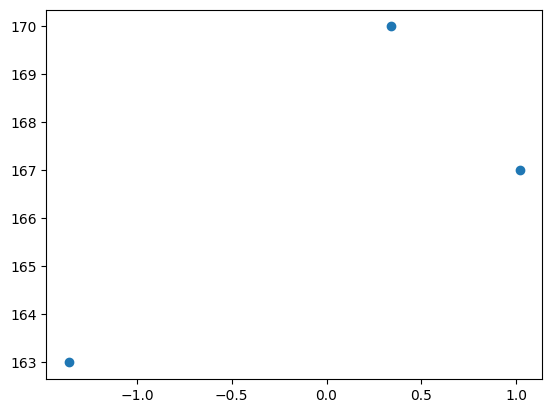

In [34]:
plt.scatter(x_train,y_train)

In [36]:
#Model Training
from sklearn.linear_model import LinearRegression

In [37]:
regressor=LinearRegression()

In [38]:
#Training the dataset
regressor.fit(x_train,y_train)

LinearRegression()

In [39]:
regressor.intercept_

array([166.66666667])

In [40]:
regressor.coef_

array([[2.15132636]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


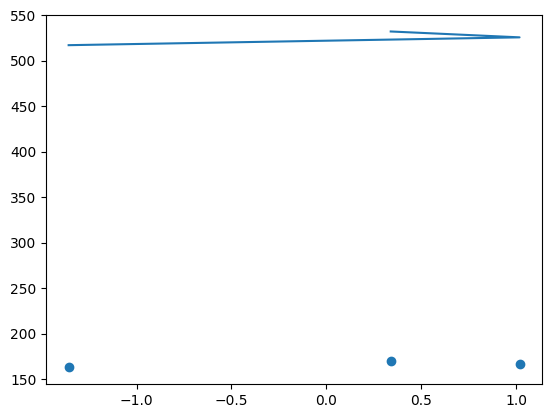

In [43]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(y_train))

In [62]:
#prediction of test data
y_predict_test=regressor.predict(x_test)

In [63]:
y_predict_test

array([[83.92481705],
       [83.92481705],
       [81.14227267],
       [85.358249  ],
       [82.8286632 ],
       [86.20144427],
       [82.23842651],
       [85.77984663],
       [83.92481705],
       [81.39523125],
       [85.358249  ],
       [81.14227267],
       [82.40706557],
       [83.25026083],
       [83.75617799],
       [81.5638703 ],
       [82.06978746],
       [83.41889989],
       [84.93665137],
       [84.26209515]])

In [47]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159
12,175
1,135
13,183
5,162
2,123


# MSE , MAE ,RMSE

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [55]:
mse=mean_squared_error(y_test,y_predict_test)
mae=mean_absolute_error(y_test,y_predict_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5783.010213967378
73.7058042544269
76.04610584354322


# R_Squared

In [56]:
from sklearn.metrics import r2_score

In [58]:
score=r2_score(y_test,y_predict_test)

In [59]:
score

-13.253434174334693

# Adjusted_R square

In [64]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-14.0452916284644